# EDA Pokemon

[Dataset]()

In [70]:
# Importar liberías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Rutas de los datasets
url_pokemon_data = 'https://git.io/JCy5l'
url_combats_data = 'https://git.io/JCSUs'

# Importar datos
df_1 = pd.read_csv(url_pokemon_data)  # Caracteristicas de Pokemones
df_2 = pd.read_csv(url_combats_data)  # Datos de combates

# Crear copias de los dataframes para trabajar con ellas
df_pokemon = df_1.copy(deep=True)
df_combats = df_2.copy(deep=True)

## Explorando el Dataset de caracteristicas de Pokemones

### Vista general

- Primeros 5 registros

In [3]:
df_pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


- Últimos 5 registros

In [4]:
df_pokemon.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


- Dimensiones del dataset

In [5]:
# Filas y columnas
df_pokemon.shape

(800, 12)

- Tipos de datos

In [6]:
df_pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

- Nombres de las columnas

In [7]:
df_pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### Estadísticos Descriptivos

In [8]:
df_pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### Distribución de los datos

- **HP**

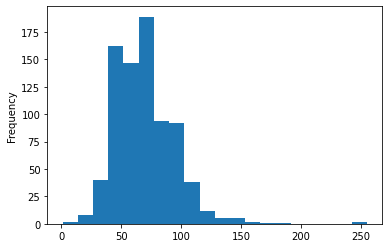

In [9]:
# HP
df_pokemon['HP'].plot.hist(bins=20)

**Conclusiones:** en el histograma se puede ver que si bien la mayoría de los Pokemones tienen cierto rango "estándar" de puntos de salud, hay algunos que tienen muchos más que los demás. En el siguiente diagrama de caja se puede apreciar esto mejor:

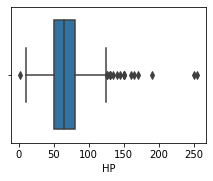

In [10]:
plt.figure(figsize=(3.5, 2.5))
sns.boxplot(data=df_pokemon, x='HP')

Otra cosa que me llama la atención es que hay un Pokemon que tiene casi 0 puntos de salud. Al filtar los Pokemones por su salud me encontre con que en efecto **hay un Pokemon que sólo tiene 1 punto de salud**, este es **Shedinja**:

In [11]:
df_pokemon.sort_values('HP', ascending=True).iloc[:1]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,317,Shedinja,Bug,Ghost,1,90,45,30,30,40,3,False


- **Attack**

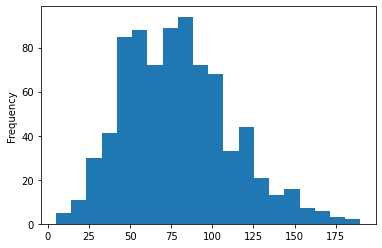

In [12]:
# Attack
df_pokemon['Attack'].plot.hist(bins=20)

- **Defence**

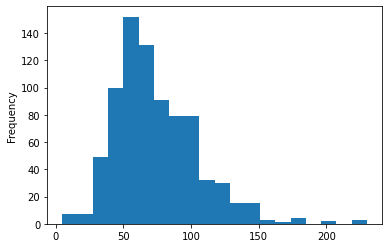

In [13]:
# Defense
df_pokemon['Defense'].plot.hist(bins=20)

**Conclusiones:** al igual que ocurria con los puntos de salud, hay algunos Pokemones que tienen una defensa que destaca por encima de los demás, algunos de ellos son:

In [14]:
df_pokemon.sort_values('Defense', ascending=False).head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False
223,224,Steelix,Steel,Ground,75,85,200,55,65,30,2,False
414,415,Regirock,Rock,NaN,80,100,200,50,100,50,3,True


- **Special Attack**

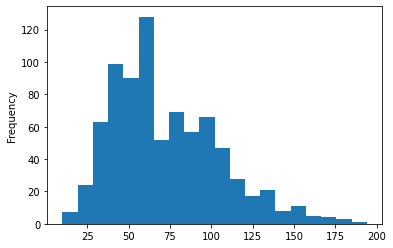

In [15]:
# Special Attack
df_pokemon['Sp. Atk'].plot.hist(bins=20)

- **Special Defence**

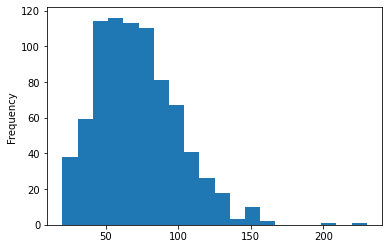

In [16]:
# Special Defence
df_pokemon['Sp. Def'].plot.hist(bins=20)

**Conclusiones:** aqui también hay algunos outliers:

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
415,416,Regice,Ice,NaN,80,50,100,100,200,50,3,True
430,431,Deoxys Defense Forme,Psychic,NaN,50,70,160,70,160,90,3,True
422,423,Primal Kyogre,Water,NaN,100,150,90,180,160,90,3,True


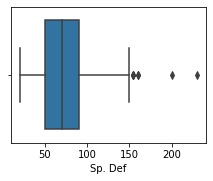

In [17]:
plt.figure(figsize=(3.5, 2.5))
sns.boxplot(data=df_pokemon, x='Sp. Def')

df_pokemon.sort_values('Sp. Def', ascending=False).iloc[:4]

- **Speed**

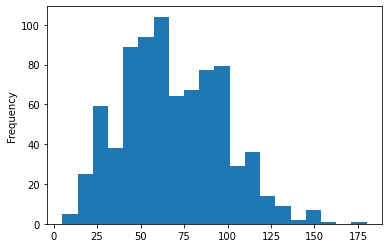

In [18]:
# Speed
df_pokemon['Speed'].plot.hist(bins=20)

**Conclusiones:** también hay outliers en esta columna:

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,3,True
315,316,Ninjask,Bug,Flying,61,90,45,50,50,160,3,False


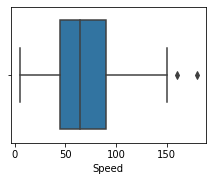

In [19]:
plt.figure(figsize=(3.5, 2.5))
sns.boxplot(data=df_pokemon, x='Speed')

df_pokemon.sort_values('Speed', ascending=False).iloc[:2]

- **Generation**

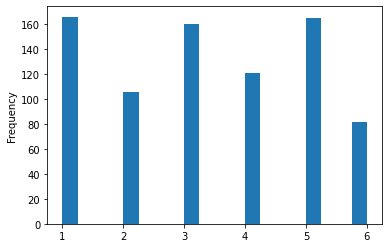

In [20]:
# Generation
df_pokemon['Generation'].plot.hist(bins=20)

**Conclusiones:** en la columna `Generation` los datos tienen una distribución muy extraña. Investigando un poco las causas de esto me encontré con que al parecer `Generetaion` es la temporada en la que apareció el Pokemon. Eso explicaría por que los datos se distribuyen de esa manera, indicanto cuantos Pokemones hay de cada generación.

### Revisando valores nulos

- Revisión de forma gráfica:

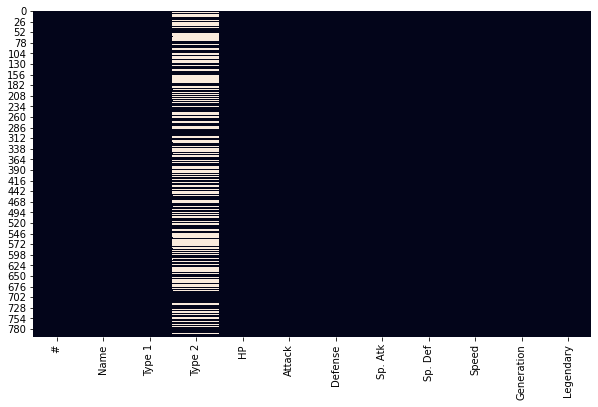

In [21]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.heatmap(df_pokemon.isnull(), cbar=False)

- Revisión de forma analítica:

In [22]:
df_pokemon.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

**Conclusiones:** la columna `Type 2` es la que contiene la mayor cantidad de valores nulos. Estuve buscando cuáles pueden ser las causas de esto y encontré que no todos los Pokemones tienen 2 clasificaciones, puede que alguno por ejemplo sea de fuego y la vez vuele por lo que tendría la clasificación `Fire` y `Flying` en las columnas `Type 1` y `Type 2` respectivamente, pero ese no es el caso de todos los Pokemones y por eso hay 386 que no tienen un segundo tipo.

### Revisando valores duplicados

In [23]:
df_pokemon.duplicated().sum()

0

**Conclusiones:** no hay valores duplicados en el dataset.

## Explorando el Dataset de combates

### Vista general

- Primeros 5 registros

In [24]:
df_combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


- Últimos 5 registros

In [25]:
df_combats.tail()

,First_pokemon,Second_pokemon,Winner
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109
49999,9,73,9


- Dimensiones del dataset

In [26]:
df_combats.shape

(50000, 3)

- Tipos de datos

In [27]:
df_combats.dtypes

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object

### Estadísticos Descriptivos

In [28]:
df_combats.describe()

,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


### Distribución de los datos

- **First pokemon**

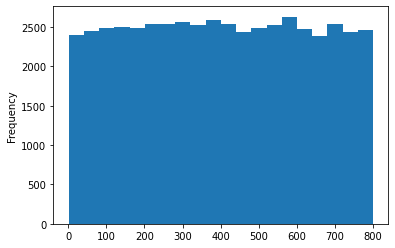

In [29]:
df_combats['First_pokemon'].plot.hist(bins=20)

**Conclusiones:** la distribución es bastante uniforme, por lo que se puede concluir que cada uno de los Pokemones tuvo más o menos el mismo número de combates.

- **Second pokemon**

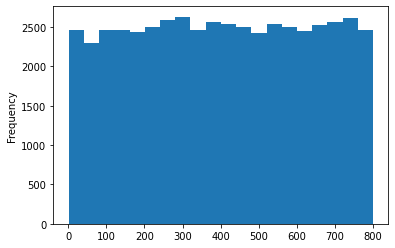

In [30]:
df_combats['Second_pokemon'].plot.hist(bins=20)

**Conclusiones:** aquí la distrubución también es bastante uniforme por lo que los Pokemones de esta columna también tuvieron más o menos el mismo número de combates.

- **Winner**

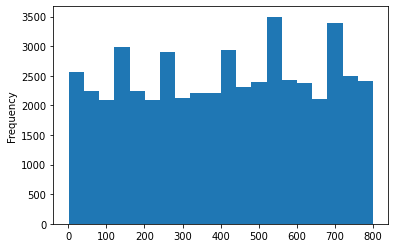

In [31]:
df_combats['Winner'].plot.hist(bins=20)

**Conclusiones:** en este caso la distribución de los Pokemones que ganaron los combates no es tan uniforme y se puede ver que algunos Pokemones tuvieron más victorias que otros.

### Revisando valores nulos

- Revisión de forma gráfica:

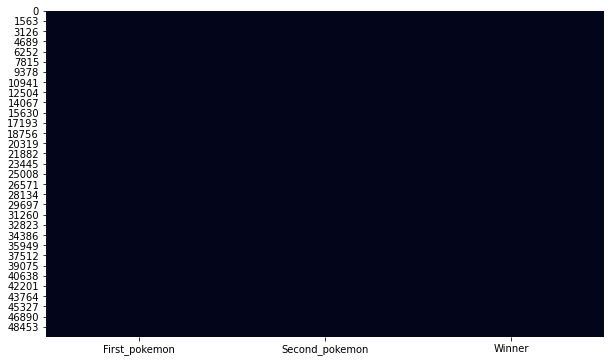

In [32]:
plt.figure(figsize=(10, 6))

sns.heatmap(df_combats.isnull(), cbar=False)

- Revisión de forma analítica:

In [33]:
df_combats.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

**Conclusion:** no se encontraron valores nulos

### Revisando valores duplicados

In [34]:
df_combats.duplicated().sum()

1952

**Conclusiones:** en este caso si hay valores duplicados, aunque esto probablemente se debe a que hay combates que se repiten, después de todo son 50,000 combates y solo 800 Pokemones.

## Preparar los datos

### Categorizar variables

In [35]:
df_pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

**Conclusiones:** las siguientes variables se pueden categorizar:

- Type 1
- Type 2
- Legendary

In [36]:
# Categorizar variables
df_pokemon[['Type 1', 'Type 2', 'Legendary']] = df_pokemon[['Type 1', 'Type 2', 'Legendary']].astype('category')
df_pokemon.dtypes

#                int64
Name            object
Type 1        category
Type 2        category
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary     category
dtype: object

- Categorias en la variable `Type 1`

In [37]:
df_pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

- Categorias en la variable `Type 2`

In [38]:
df_pokemon['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

### Obtener Dummies

- Type 1

In [39]:
dummies_type_1 = pd.get_dummies(df_pokemon['Type 1'])
dummies_type_1

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


- Type 2

In [40]:
dummies_type_2 = pd.get_dummies(df_pokemon['Type 2'])
dummies_type_2

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
796,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
797,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
798,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- Legendary

In [41]:
dummies_legendary = pd.get_dummies(df_pokemon['Legendary'])
dummies_legendary

,False,True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
795,0,1
796,0,1
797,0,1
798,0,1


### Exportar datos procesados

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Exportar Dummies

In [ ]:
dummies_type_1.to_csv('/content/drive/MyDrive/Colab Notebooks/Datacademy-Project/processed/dummies_type_1.csv')
dummies_type_2.to_csv('/content/drive/MyDrive/Colab Notebooks/Datacademy-Project/processed/dummies_type_2.csv')
dummies_legendary.to_csv('/content/drive/MyDrive/Colab Notebooks/Datacademy-Project/processed/dummies_legendary.csv')

- Exportar los datos de los Pokemones

In [90]:
df_pokemon.to_csv('/content/drive/MyDrive/Colab Notebooks/Datacademy-Project/processed/pokemon.csv')

**Conclusiones:** por ahora voy a **exportar las dummies como archivos CSV** para integrarlas luego al Dataframe según se requiera. Por ahora pueden ser útiles para graficar los tipos de Pokemones y cuáles son legendarios o no.

**Tampoco borre los datos nulos** porque creo que por ahora también pueden aportar información relevante, los quitaré en el preprocesamiento de los datos antes de ingresarlos al modelo